In [1]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
neural_dat=np.array(hf['CellResp'])
del hf
regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')
cell_pos=regressors['data']['CellXYZ'][0][0]
missing_values=regressors['data']['IX_inval_anat'][0][0]
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [3]:
print(neural_dat.shape)

(2880, 83205)


(array([ 14.,  73., 255., 611., 833., 636., 327., 102.,  22.,   7.]),
 array([-0.14315248, -0.09763455, -0.05211663, -0.00659871,  0.03891921,
         0.08443713,  0.12995505,  0.17547297,  0.2209909 ,  0.26650882,
         0.31202674], dtype=float32),
 <a list of 10 Patch objects>)

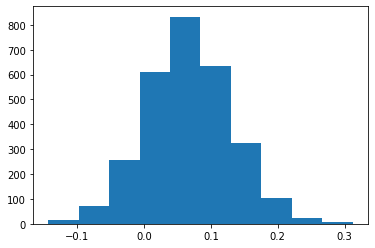

In [6]:
plt.hist(neural_dat[:,1])

In [8]:
stim_dat=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')['data']['stim_full'][0][0]

In [9]:
print(np.unique(stim_dat))

[0 1 2 3]


(array([  8.,  35.,  74., 111., 138., 173.,  96.,  61.,  19.,   5.]),
 array([-0.10338461, -0.06751202, -0.03163943,  0.00423316,  0.04010575,
         0.07597834,  0.11185093,  0.14772353,  0.1835961 ,  0.2194687 ,
         0.2553413 ], dtype=float32),
 <a list of 10 Patch objects>)

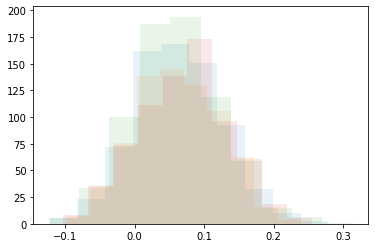

In [15]:
plt.hist(neural_dat[stim_dat.flatten()==0,0],alpha=0.1)
plt.hist(neural_dat[stim_dat.flatten()==1,0],alpha=0.1)
plt.hist(neural_dat[stim_dat.flatten()==2,0],alpha=0.1)
plt.hist(neural_dat[stim_dat.flatten()==3,0],alpha=0.1)

In [26]:
def plot_gaussian_responses(neural_dat,stim_dat,neuron_ind):
    plt.hist(neural_dat[stim_dat.flatten()==0,neuron_ind],alpha=0.1)
    plt.hist(neural_dat[stim_dat.flatten()==1,neuron_ind],alpha=0.1)
    plt.hist(neural_dat[stim_dat.flatten()==2,neuron_ind],alpha=0.1)
    plt.hist(neural_dat[stim_dat.flatten()==3,neuron_ind],alpha=0.1)
    plt.title('Neuron nr '+str(neuron_ind)+', response distribution for different stimuli')

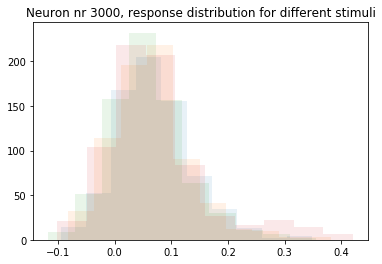

In [39]:
plot_gaussian_responses(neural_dat,stim_dat,3000)

In [37]:
def circle(center_x,center_y,radius,h,k):
    within_circle=radius>np.sqrt((center_x-h)**2+(center_y-k)**2)
    #print(within_circle)
    return within_circle

center_x=cell_pos[3000][0]
center_y=cell_pos[3000][1]

boolean_arr=[]
for j in range(0,83205):
    boolean_ind=circle(center_x,center_y,100,cell_pos[j][0],cell_pos[j][1])
    boolean_arr.append(boolean_ind)
print(sum(boolean_arr))

/home/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ushort_scalars
  


740


(array([ 15., 211., 272., 123.,  59.,  11.,   6.,   9.,   7.,   7.]),
 array([0.02979451, 0.04101063, 0.05222676, 0.06344289, 0.07465901,
        0.08587514, 0.09709127, 0.1083074 , 0.11952353, 0.13073964,
        0.14195578], dtype=float32),
 <a list of 10 Patch objects>)

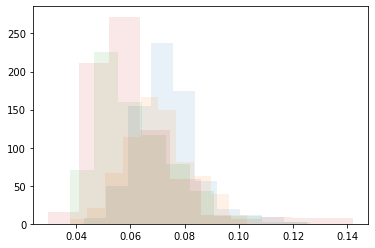

In [38]:
mean=np.mean(neural_dat[:,boolean_arr],axis=1)
plt.hist(mean[stim_dat.flatten()==0],alpha=0.1)
plt.hist(mean[stim_dat.flatten()==1],alpha=0.1)
plt.hist(mean[stim_dat.flatten()==2],alpha=0.1)
plt.hist(mean[stim_dat.flatten()==3],alpha=0.1)